In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random, sample, randint
#%matplotlib inline

In [37]:
def GraficaSuperficie(function ):
    #Gráficas de curvas de nivel

    X = np.linspace(-5,5,100)
    Y = np.linspace(-5,5,100)
    X, Y = np.meshgrid(X, Y)
    Z = getFunction(X,Y,function)
    
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    plt.clabel(ax, inline=1, fontsize=10)
    plt.title('Poblacion')



In [41]:
def GraficaPoblaciones(Ps,function,gen = False):
    #Gráficas de curvas de nivel
    plt.clf()
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-10,10,100)
    Y = np.linspace(-10,10,100)
    X, Y = np.meshgrid(X, Y)
    Z = getFunction(X,Y,function)
    plt.clf()
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    plt.clabel(ax, inline=1, fontsize=10)
    plt.title('Poblacion')

    #grafica la población
    cols = ['r','b','g','k']
    for i,P in enumerate(Ps):
        if gen:
            for I in P:
                [x1,x2] = I[0],I[1]
                ax.scatter3D(x1,x2,s=30,c=cols[i%4])    
        else:
            for I in P:
                [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
                ax.scatter3D(x1,x2,s=30,c=cols[i%4])    
    plt.show()

In [40]:
def getFunction(X,Y,function = None):
    if function == 1 : #Funcion de De Jong
        Z = X**2 + Y**2

    elif function == 2: #Funcion: Rosenbrock's Valley
        Z = 100*(Y-X**2)**2 + (1-X)**2 
        
    elif function == 3: #Funcion de Rastrigin
        Z = 20+X**2+Y**2-10*np.cos(2*np.pi*X)-10*np.cos(2*np.pi*Y)
        
    elif function == 4: #Funcion Rotated hyper-ellipsoid
        Z=X**2 + (X**2 +Y**2)
    
    elif function == 5:
        Z= ((X**2 + Y**2)/4000) - np.cos(X)*np.cos(Y/np.sqrt(2)) + 1

    
    return Z

In [3]:
def IniciaPob(N,n_var,n_bits):
    Pob = []
    for i in range(N):
        I = ''
        for v in range(n_var):
            for b in range(n_bits):
                I = I+sample(['0','1'],1)[0]
        Pob.append(I)
    return Pob

In [4]:
def Ind2Number(I, v_min, v_max, n_vars, n_bits):        
    numb = []
    for i in range(n_vars):
        cod_v = I[i*n_bits:(i+1)*n_bits]
        d_i = int(cod_v,2)
        val = v_min[i]+d_i*(v_max[i]-v_min[i])/float(2**n_bits-1)
        numb.append(val)
    return numb        

In [5]:
def Convert_Poblation(P0,v_min,v_max,n_vars,n_bits):
    pop = []
    for item in P0:
        pop.append(Ind2Number(item,v_min,v_max,n_vars,n_bits))
    return pop
    

In [6]:
N = 10
n_bits = 4
n_var = 2
v_min = [-5,-5]
v_max = [5,5] 

P0 = IniciaPob(N,n_var,n_bits)
P0_Gen = Convert_Poblation(P0,v_min,v_max,n_var,n_bits)
P0_Gen

[[1.0, 1.666666666666667],
 [-2.3333333333333335, -1.0],
 [1.666666666666667, -1.0],
 [-0.33333333333333304, 3.0],
 [-3.666666666666667, -4.333333333333333],
 [-2.3333333333333335, 4.333333333333334],
 [-1.6666666666666665, 2.333333333333333],
 [-1.0, -3.0],
 [-4.333333333333333, 5.0],
 [-2.3333333333333335, 1.666666666666667]]

In [7]:
def Aptitude(I,f,gen = False):
    if gen:
        [x1,x2] = I[0],I[1]
    else:
        [x1,x2] = Ind2Number(I,v_min,v_max,n_var,n_bits)
        
    r = getFunction(x1,x2,f)
    return 1.0/(1.0+0.1*r)

In [8]:
def Evo(parents,child_size,ro):
    childs = []
    for i in range(child_size):
        p = np.array(sample(parents,ro))
        childs.append([np.sum(p[:,0])/len(p),np.sum(p[:,1])/len(p)])
    return childs

Gen_Childs = Evo(P0_Gen,len(P0_Gen)+20,5)
Gen_Childs

[[-1.9333333333333336, 0.8666666666666668],
 [-1.9333333333333331, 2.3333333333333335],
 [-1.1333333333333333, 1.4],
 [-1.9333333333333336, 0.46666666666666695],
 [-2.066666666666667, 0.33333333333333337],
 [-0.1999999999999999, 0.4666666666666668],
 [-1.8, -0.6],
 [-1.6666666666666667, -0.9999999999999998],
 [-1.8, -0.06666666666666661],
 [-1.1333333333333333, 1.4],
 [-0.4666666666666666, -0.2],
 [-1.6666666666666665, 0.8666666666666668],
 [-1.0, 1.5333333333333334],
 [-0.6, 0.20000000000000018],
 [-2.066666666666667, 0.7333333333333336],
 [-2.066666666666667, 2.3333333333333335],
 [-1.8, 0.06666666666666679],
 [-2.333333333333333, 2.6000000000000005],
 [-1.8, 0.06666666666666679],
 [-0.8666666666666665, 1.5333333333333337],
 [-1.5333333333333337, 0.6000000000000002],
 [-1.9333333333333331, 1.4000000000000001],
 [-1.1333333333333333, -0.2],
 [-2.2, -0.3333333333333332],
 [-2.1999999999999997, 0.6000000000000002],
 [-0.4666666666666666, -0.7333333333333332],
 [-1.6666666666666667, 3.13

In [42]:
def Mutacion(P,sd):
    mutatedChilds = []
    for i in P:
        mutatedChilds.append([i[0]+np.random.normal(loc = 0,scale=sd),i[1]+np.random.normal(loc = 0,scale=sd)])
    return mutatedChilds

Gen_Childs = Mutacion(Gen_Childs,.5)
Gen_Childs

[[-1.0088634053026677, -0.35878776747271623],
 [-2.118092845791131, 3.017487279143046],
 [-1.2776339768309457, 1.7807507178150461],
 [-1.9578670606573925, -0.6826597866634447],
 [-2.300881392740108, 0.5591276167621045],
 [-0.3686418999460763, -0.5570031631263619],
 [-2.213687087698486, -0.4093074916057894],
 [-1.7264361957982453, -1.8512639498678658],
 [-1.3941354300731559, -1.0305015341731656],
 [-0.17979896060278056, 1.251335787421786],
 [-1.8861525186285961, -1.7372376421270173],
 [-1.1544640668800432, 0.8512457727399851],
 [-0.5492286866283599, 2.0679569066240338],
 [-2.6109404589062692, 1.0530003571919282],
 [-1.4061513149366023, 0.30464239770793167],
 [-2.6266912336044004, 2.629509722353427],
 [-0.27938149318469807, 1.1497872521830257],
 [-1.8403556213244943, 1.887115289489027],
 [-1.7277738129609703, -0.03385238106919375],
 [-0.6852123443113509, 0.8387605225981678],
 [-2.047073559086487, 0.08963686644456287],
 [-2.3947004629307638, 1.2353357634298057],
 [-1.4601800469603012, -1.

<Figure size 432x288 with 0 Axes>

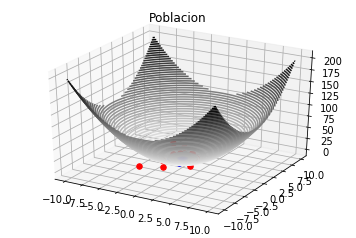

In [47]:
def Seleccion(P,N,function):
    selected = []
    aptitudes = []
    newGen = []
    
    for i in P:
        aptitudes.append(np.array([i[0],i[1],Aptitude(i,function,True)]))
    aptitudes = sorted(aptitudes,key= lambda x: x[2],reverse=True)
    
    for new in aptitudes[:10]:
        newGen.append([new[0],new[1]])
    
    return newGen

newGen = Seleccion(Gen_Childs,N,1)

GraficaPoblaciones([P0_Gen,newGen],1,True)

<Figure size 432x288 with 0 Axes>

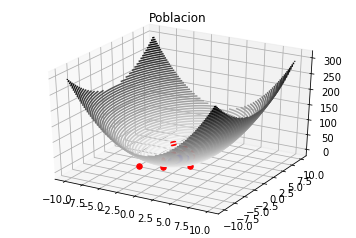

In [49]:
GraficaPoblaciones([P0_Gen,newGen],4,True)

In [39]:
def gradiente(X,Y,function):
    xgrad = 0
    ygrad = 0
    
    if function == 1 : #Funcion de De Jong
        xgrad = 2*X
        ygrad = 2*Y

    elif function == 2: #Funcion: Rosenbrock's Valley
        
        #Z = 100*(Y-X**2)**2 + (1-X)**2 
        xgrad = -400*X(Y-X**2) + 2(1-X)
        ygrad = 200(1-X**2)
        
    elif function == 3: #Funcion de Rastrigin
        xgrad = 2*X + 20*np.pi*np.sin(2*np.pi*X)
        ygrad = 2*Y + 20*np.pi*np.sin(2*np.pi*Y)
    
    elif function == 4: #Funcion Rotated Hyper-ellipsoid
        xgrad = 4*X
        ygrad = 2*Y
       
    elif function == 5: #Funcion de Grimewangk
        xgrad = (X/2000) + np.sin(X)*np.cos(Y/np.sqrt(2))
        ygrad = (Y/2000) + (1/sqrt(2))*np.cos(X)*np.sin(Y/np.sqrt(2))


    
    return xgrad,ygrad

In [ ]:
Y